In [4]:
from scipy.optimize import minimize
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
tb1 =pd.read_excel('regcar (1).xlsx')
tb1

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [15]:
import statsmodels.api as sm
x= tb1['TV Ads']
y= tb1['car Sold']
x2 =sm.add_constant(x)
modl=sm.OLS(y,x2)
modl2 =modl.fit()
print(modl2.summary())

                            OLS Regression Results                            
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0190
Time:                        11:27:54   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [17]:
e=modl2.resid

In [18]:
e

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64

In [19]:
np.std(e)

1.6733200530681507

In [20]:
def lik(parameters):
    m=parameters[0]
    b=parameters[1]
    sigma=parameters[2]
    for i in np.arange(0, len(x)):
        y_exp =m*x + b
        L= (len(x)/2 * np.log(2 *np.pi)+len(x)/2*np.log(sigma ** 2)+1/
            (2 * sigma ** 2) * sum((y-y_exp) **2))
        return L

In [23]:
lik_model = minimize(lik, np.array([5,5,5]),method='Nelder-Mead')

In [24]:
lik_model.x

array([ 4.99997913, 10.00006001,  1.67332791])

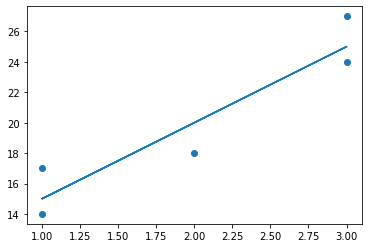

In [25]:
plt.scatter(x,y)
plt.plot(x, lik_model['x'][0] * x +lik_model['x'][1])
plt.show()
         